##### 마일스톤 바우처 감리 대응 
----------------------

# 상업부동산 가격 예측 모형 및 비교 

In [1]:
import os
print(os.getcwd())

D:\02.users\seo_kim931\voucher2020\milestone_code


In [194]:
import glob
import warnings
warnings.filterwarnings(action='ignore')

from datetime import date
import datetime

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer 

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
# matplotlib 한글 폰트 설정

# 버전 체크 
print("===========================================")
print("  matplotlib ver. =========================")
print("===========================================")
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print("===========================================")
print ('설정 파일 위치: ', mpl.matplotlib_fname())

print("===========================================")
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print("전체 폰트 수:", len(font_list))
print(font_list[:4],' ... ')

print("===========================================")
MalgunFontFamily = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
print(MalgunFontFamily)


  matplotlib ver. =========================
버전:  3.3.2
설치 위치:  D:\00.dev\Anaconda\envs\seo_kim931-py37\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\seo_kim931\.matplotlib
캐시 위치:  C:\Users\seo_kim931\.matplotlib
설정 파일 위치:  D:\00.dev\Anaconda\envs\seo_kim931-py37\lib\site-packages\matplotlib\mpl-data\matplotlibrc
전체 폰트 수: 375
['C:\\Windows\\Fonts\\seguibli.ttf', 'C:\\Windows\\Fonts\\CALIFB.TTF', 'C:\\Windows\\Fonts\\consola.ttf', 'C:\\Windows\\Fonts\\TCCM____.TTF']  ... 
[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'), ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'), ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]


In [4]:
print("한글 폰트 : ", MalgunFontFamily[0][0])

plt.rcParams["font.family"] = MalgunFontFamily[0][0]

한글 폰트 :  Malgun Gothic


In [5]:
# pg = sns.load_dataset("penguins")
# pg['flipper_length_mm']

#sns.displot(data='DataFrame', x="col_name")
#sns.displot(data=pg) # <- show all varialbles densities in a histogram 
#sns.displot(data=pg, x='flipper_length_mm') # <- single displot 
#sns.displot(data=pg, x='flipper_length_mm', kind='kde') # <- single displot 

In [6]:
# Set Data directory
# data_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/'
# save_dir = 'C:/Users/seoun/Desktop/Python/milestone_data/datasets/'

data_dir = 'D:/02.users/seo_kim931/voucher2020/milestone_data/'
save_dir = 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets/'


In [7]:
glob.glob(save_dir + '*.csv')

['D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\01.거시경제지표_분기주기지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\01.거시경제지표_연주기지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\01.거시경제지표_월주기+전국서울지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\01.거시경제지표_월주기지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\02.지가변동률_월주기_서울동별.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\02.지가지수_월주기_서울동별.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\03.상업부동산_실거래기록_매매_서울.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\04.부동산관련지수_월주기+전국서울지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\04.부동산관련지수_월주기지표.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\05.유동인구_지하철승하차이용객수_2019년_시간주기+역별.csv',
 'D:/02.users/seo_kim931/voucher2020/milestone_data/datasets\\06.학교기본정보_서울.csv']

### 상업부동산 매매 기록 (2018-2019)

In [8]:
# save_dir + '03.상업부동산_실거래기록_매매_서울.csv'
est_df = pd.read_csv(save_dir + '03.상업부동산_실거래기록_매매_서울.csv', encoding='euc-kr')
print(est_df.shape)
est_df.head(10)

(40932, 15)


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,지분구분,건축년도
0,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,241.51,,"41,800",NaN,201801,4,,1984.0
1,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제1종근린생활,25m미만,56.16,,"32,000",5.0,201801,4,,1984.0
2,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,182.01,,"50,000",NaN,201801,5,,1984.0
3,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,8m미만,90.15,,"39,000",NaN,201801,23,,1984.0
4,서울특별시 강남구 개포동,집합,6**,개포로,제3종일반주거,제2종근린생활,25m미만,12.65,,"7,000",NaN,201802,1,,1991.0
5,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,21.06,,"13,670",4.0,201802,5,,1984.0
6,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,100.80,,"65,400",4.0,201802,5,,1984.0
7,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,50.40,,"32,700",4.0,201802,5,,1984.0
8,서울특별시 강남구 개포동,일반,1***,논현로20길,준주거,제2종근린생활,8m미만,884.45,265,"435,500",NaN,201802,13,,1990.0
9,서울특별시 강남구 개포동,일반,1***,논현로16길,준주거,제2종근린생활,25m미만,748.61,254.8,"340,000",NaN,201802,14,,1991.0


In [9]:
# Frequency Table 

# n_num =  100

# # est_df[est_df.nunique().le(n_num)]

# est_df.nunique().le(n_num)

### feature engineering 

In [10]:
# 1. 변수변환 
# : 현재년도 - 건축년도 = 건물연식 
#     + 건물연식 정규화(min-max)
# >>> 건축년도는 현재에 가까울수록 숫자가 높음, 
# '건물연식으로 변환 후, 값에 대한 정규화 진행'

### 계약일자

In [11]:
# 
print('# of "len(YYYYMM)!=6": ', est_df['계약년월'].astype(str).str.len().ne(6).sum())
print('# of Null            : ', est_df['계약년월'].isna().sum())


# of "len(YYYYMM)!=6":  0
# of Null            :  0


In [12]:
est_df['계약년월'].astype(str).str[:4].value_counts() 

2019    16506
2018    14714
2020     9712
Name: 계약년월, dtype: int64

In [13]:
est_df['cont_yyyy'] = est_df['계약년월'].astype(str).str[:4]

est_df['cont_mm'] = est_df['계약년월'].astype(str).str[4:]

est_df['cont_dd'] = est_df['계약일'].astype(str)

est_df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,지분구분,건축년도,cont_yyyy,cont_mm,cont_dd
0,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,241.51,,"41,800",NaN,201801,4,,1984.0,2018,01,4
1,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제1종근린생활,25m미만,56.16,,"32,000",5.0,201801,4,,1984.0,2018,01,4
2,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,182.01,,"50,000",NaN,201801,5,,1984.0,2018,01,5
3,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,8m미만,90.15,,"39,000",NaN,201801,23,,1984.0,2018,01,23
4,서울특별시 강남구 개포동,집합,6**,개포로,제3종일반주거,제2종근린생활,25m미만,12.65,,"7,000",NaN,201802,1,,1991.0,2018,02,1


### 건축년도

In [14]:
# stats. 
est_df['건축년도'].describe()

count    40205.000000
mean      1997.401418
std         52.774219
min          0.000000
25%       1989.000000
50%       2003.000000
75%       2008.000000
max       2020.000000
Name: 건축년도, dtype: float64

In [15]:
# look-up Null and 0 values

print('# of rows: ', est_df['건축년도'].shape[0])
print('# of Null: ', est_df['건축년도'].isna().sum())
print('# of 0   : ', est_df['건축년도'].eq(0).sum())


# of rows:  40932
# of Null:  727
# of 0   :  26


In [16]:
# drop rows with '건축년도' == '0' or None 
est_df = est_df.loc[est_df['건축년도'].ne(0), ]
est_df.dropna(subset=['건축년도'], inplace=True)


In [17]:
# look-up Null and 0 values

print('# of rows: ', est_df['건축년도'].shape[0])
print('# of Null: ', est_df['건축년도'].isna().sum())
print('# of 0   : ', est_df['건축년도'].eq(0).sum())


# of rows:  40179
# of Null:  0
# of 0   :  0


In [18]:
# ((2020 - est_df['건축년도'])==0).sum()
# est_df.loc[est_df['건축년도']==2020,]

# this_year = date.today().year

ages = est_df['cont_yyyy'].astype(int) - est_df['건축년도'] + 1
print('Min. of bdg ages:', ages.min())
print('Max. of bdg ages:', ages.max())




Min. of bdg ages: 0.0
Max. of bdg ages: 105.0


In [19]:
est_df['ages'] = ages
# del est_df['건축년도']

est_df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,지분구분,건축년도,cont_yyyy,cont_mm,cont_dd,ages
0,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,241.51,,"41,800",NaN,201801,4,,1984.0,2018,01,4,35.0
1,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제1종근린생활,25m미만,56.16,,"32,000",5.0,201801,4,,1984.0,2018,01,4,35.0
2,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,182.01,,"50,000",NaN,201801,5,,1984.0,2018,01,5,35.0
3,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,8m미만,90.15,,"39,000",NaN,201801,23,,1984.0,2018,01,23,35.0
4,서울특별시 강남구 개포동,집합,6**,개포로,제3종일반주거,제2종근린생활,25m미만,12.65,,"7,000",NaN,201802,1,,1991.0,2018,02,1,28.0


## 시군구

In [20]:
est_df['시군구'].value_counts()

서울특별시 구로구 구로동        2710
서울특별시 서초구 서초동        1272
서울특별시 영등포구 영등포동3가    1133
서울특별시 강남구 역삼동         943
서울특별시 광진구 구의동         856
                     ... 
서울특별시 중구 봉래동1가          1
서울특별시 종로구 송월동           1
서울특별시 성북구 안암동2가         1
서울특별시 종로구 사간동           1
서울특별시 성북구 보문동3가         1
Name: 시군구, Length: 435, dtype: int64

In [21]:
cities = est_df['시군구'].str.split().apply(lambda row_: row_[0])
provn = est_df['시군구'].str.split().apply(lambda row_: row_[1])
distc = est_df['시군구'].str.split().apply(lambda row_: row_[2])

print("  * City counts \n", cities.value_counts());print("\n")
print("  * Province counts \n", provn.value_counts());print("\n")
print("  * District counts \n", distc.value_counts());print("\n")

  * City counts 
 서울특별시    40179
Name: 시군구, dtype: int64


  * Province counts 
 구로구     3732
중구      3282
강남구     3237
영등포구    3063
서초구     2287
송파구     2073
용산구     1944
강동구     1913
강서구     1858
동대문구    1731
마포구     1670
광진구     1398
은평구     1377
종로구     1374
양천구     1236
금천구     1053
성북구      991
노원구      964
관악구      891
성동구      805
강북구      723
서대문구     689
도봉구      660
동작구      639
중랑구      589
Name: 시군구, dtype: int64


  * District counts 
 구로동       2710
서초동       1272
영등포동3가    1133
역삼동        943
구의동        856
          ... 
권농동          1
체부동          1
율현동          1
송월동          1
보문동3가        1
Name: 시군구, Length: 434, dtype: int64




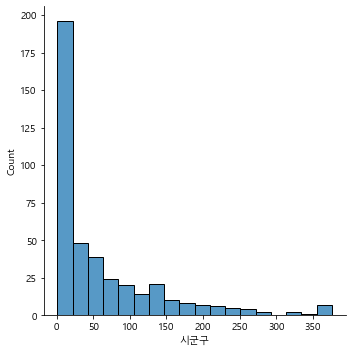

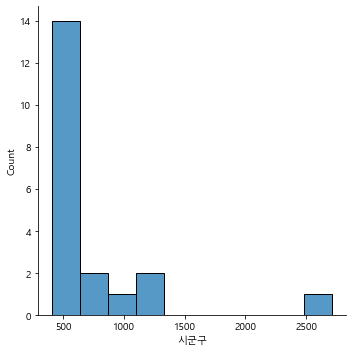

In [22]:
# sns.displot(data=distc)
dit_val = distc.value_counts()
# dit_val[dit_val.lt(400)]
sns.displot(data=dit_val[dit_val.lt(400)], kind='hist')
sns.displot(data=dit_val[dit_val.ge(400)], kind='hist')

In [23]:
# split addresses 

est_df['city'] = est_df['시군구'].str.split().apply(lambda row_: row_[0])
est_df['prvn'] = est_df['시군구'].str.split().apply(lambda row_: row_[1])
est_df['dstc'] = est_df['시군구'].str.split().apply(lambda row_: row_[2])

est_df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),...,계약일,지분구분,건축년도,cont_yyyy,cont_mm,cont_dd,ages,city,prvn,dstc
0,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,12m미만,241.51,,"41,800",...,4,,1984.0,2018,01,4,35.0,서울특별시,강남구,개포동
1,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제1종근린생활,25m미만,56.16,,"32,000",...,4,,1984.0,2018,01,4,35.0,서울특별시,강남구,개포동
2,서울특별시 강남구 개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,182.01,,"50,000",...,5,,1984.0,2018,01,5,35.0,서울특별시,강남구,개포동
3,서울특별시 강남구 개포동,집합,1**,개포로82길,일반상업,제2종근린생활,8m미만,90.15,,"39,000",...,23,,1984.0,2018,01,23,35.0,서울특별시,강남구,개포동
4,서울특별시 강남구 개포동,집합,6**,개포로,제3종일반주거,제2종근린생활,25m미만,12.65,,"7,000",...,1,,1991.0,2018,02,1,28.0,서울특별시,강남구,개포동


In [24]:
time_freq_by_addr = est_df.groupby(['계약년월','시군구'])['유형'].count().reset_index()
time_freq_by_addr.rename(columns={'유형':'counts'}, inplace=True)
time_freq_by_addr

,계약년월,시군구,counts
0,201801,서울특별시 강남구 개포동,4
1,201801,서울특별시 강남구 논현동,11
2,201801,서울특별시 강남구 대치동,15
3,201801,서울특별시 강남구 도곡동,4
4,201801,서울특별시 강남구 삼성동,10
...,...,...,...
7039,202008,서울특별시 중구 황학동,1
7040,202008,서울특별시 중랑구 면목동,2
7041,202008,서울특별시 중랑구 상봉동,2
7042,202008,서울특별시 중랑구 신내동,6


In [25]:
est_df.loc[est_df['cont_yyyy'].eq('2020'), 'cont_mm'].value_counts().sort_index()
# 2020.08 data for validation.  

01    1247
02    1410
03     990
04     983
05    1102
06    1685
07    1621
08     509
Name: cont_mm, dtype: int64

In [26]:

mask_ = est_df['cont_yyyy'].eq('2020') & est_df['cont_mm'].eq('08')

val_set1 = est_df.loc[mask_, '시군구'].value_counts().index

val_set1

Index(['서울특별시 용산구 동자동', '서울특별시 구로구 신도림동', '서울특별시 용산구 한강로2가', '서울특별시 송파구 문정동',
       '서울특별시 관악구 신림동', '서울특별시 마포구 상암동', '서울특별시 구로구 구로동', '서울특별시 서초구 서초동',
       '서울특별시 중구 산림동', '서울특별시 중구 을지로6가',
       ...
       '서울특별시 중구 을지로5가', '서울특별시 중랑구 중화동', '서울특별시 종로구 평창동', '서울특별시 영등포구 문래동1가',
       '서울특별시 종로구 통인동', '서울특별시 영등포구 영등포동7가', '서울특별시 광진구 군자동', '서울특별시 영등포구 신길동',
       '서울특별시 중구 남대문로5가', '서울특별시 서대문구 대현동'],
      dtype='object', length=159)

In [27]:
mask_ = est_df['시군구'].isin(val_set1) & est_df['계약년월'].ne(202008)

cont_num = est_df.loc[mask_,'시군구'].value_counts()

val_provn_ = cont_num[cont_num.gt(600)].index

print('# of provinces for Train & Set:', len(val_provn_))
print(" ===== Target provinces for validate: ===== ")
print(val_provn_.values)

# of provinces for Train & Set: 7
 ===== Target provinces for validate: ===== 
['서울특별시 구로구 구로동' '서울특별시 서초구 서초동' '서울특별시 영등포구 영등포동3가' '서울특별시 강남구 역삼동'
 '서울특별시 광진구 구의동' '서울특별시 강동구 천호동' '서울특별시 중구 신당동']


In [28]:
# filtering out
est_df_02 = est_df[est_df['시군구'].isin(val_provn_)]
print(est_df_02.shape)
est_df_02.head()

(8355, 22)


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),...,계약일,지분구분,건축년도,cont_yyyy,cont_mm,cont_dd,ages,city,prvn,dstc
699,서울특별시 강남구 역삼동,일반,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,1050.72,449.3,"1,050,000",...,4,,1984.0,2018,01,4,35.0,서울특별시,강남구,역삼동
700,서울특별시 강남구 역삼동,집합,7**,언주로,제3종일반주거,제1종근린생활,25m이상,41.40,,"17,238",...,9,,2016.0,2018,01,9,3.0,서울특별시,강남구,역삼동
701,서울특별시 강남구 역삼동,일반,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,236.24,136.7,"510,000",...,9,,1976.0,2018,01,9,43.0,서울특별시,강남구,역삼동
702,서울특별시 강남구 역삼동,집합,8**,강남대로,일반상업,업무,25m이상,156.11,,"81,500",...,9,,1985.0,2018,01,9,34.0,서울특별시,강남구,역삼동
703,서울특별시 강남구 역삼동,집합,8**,도곡로3길,일반상업,업무,12m미만,38.80,,"16,800",...,9,,1999.0,2018,01,9,20.0,서울특별시,강남구,역삼동


In [29]:
est_df_02['price'] = est_df_02['거래금액(만원)'].str.replace(',','').astype(int)

In [30]:
yyyymm_ = est_df_02['계약년월'].astype(str)    # 201910 -> '201910'
dd_ = est_df_02['계약일'].astype(str).str.rjust(width=2, fillchar='0') #  4 -> '04'

yyyymmdd_ = yyyymm_ + dd_   # -> '20191004'

est_df_02['date'] = pd.to_datetime(yyyymmdd_, format='%Y%m%d')

# .astype(str).apply(lambda x: datetime.datetime.strptime(x, '%Y%m'))

# sns.scatterplot(data=est_df_02, x='계약년월', y='거래금액(만원)', hue='시군구')

In [31]:
est_df_02.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),...,건축년도,cont_yyyy,cont_mm,cont_dd,ages,city,prvn,dstc,price,date
699,서울특별시 강남구 역삼동,일반,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,1050.72,449.3,"1,050,000",...,1984.0,2018,01,4,35.0,서울특별시,강남구,역삼동,1050000,2018-01-04
700,서울특별시 강남구 역삼동,집합,7**,언주로,제3종일반주거,제1종근린생활,25m이상,41.40,,"17,238",...,2016.0,2018,01,9,3.0,서울특별시,강남구,역삼동,17238,2018-01-09
701,서울특별시 강남구 역삼동,일반,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,236.24,136.7,"510,000",...,1976.0,2018,01,9,43.0,서울특별시,강남구,역삼동,510000,2018-01-09
702,서울특별시 강남구 역삼동,집합,8**,강남대로,일반상업,업무,25m이상,156.11,,"81,500",...,1985.0,2018,01,9,34.0,서울특별시,강남구,역삼동,81500,2018-01-09
703,서울특별시 강남구 역삼동,집합,8**,도곡로3길,일반상업,업무,12m미만,38.80,,"16,800",...,1999.0,2018,01,9,20.0,서울특별시,강남구,역삼동,16800,2018-01-09


<AxesSubplot:xlabel='date', ylabel='price'>

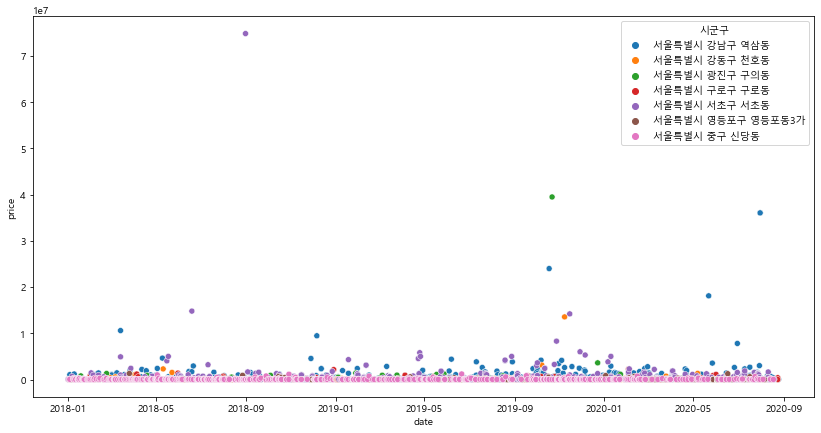

In [32]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=est_df_02, x='date', y='price', hue='시군구')

In [33]:

# mask = est_df_02['대지면적(㎡)'].str.isnumeric()

# #est_df_02.loc[~mask,'대지면적(㎡)']
# #est_df_02.loc[,'대지면적(㎡)']

# # 
# est_df_02['대지면적(㎡)'].str.strip()


In [34]:
#est_df_02['전용/연면적(㎡)'].isna().sum()
#est_df_02['전용/연면적(㎡)'].str.split().eq('').sum()

# relative_price = 1제곱미터당 x 만원
est_df_02['relprice'] = est_df_02['price'] / est_df_02['전용/연면적(㎡)']
est_df_02.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),...,cont_yyyy,cont_mm,cont_dd,ages,city,prvn,dstc,price,date,relprice
699,서울특별시 강남구 역삼동,일반,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,1050.72,449.3,"1,050,000",...,2018,01,4,35.0,서울특별시,강남구,역삼동,1050000,2018-01-04,999.314756
700,서울특별시 강남구 역삼동,집합,7**,언주로,제3종일반주거,제1종근린생활,25m이상,41.40,,"17,238",...,2018,01,9,3.0,서울특별시,강남구,역삼동,17238,2018-01-09,416.376812
701,서울특별시 강남구 역삼동,일반,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,236.24,136.7,"510,000",...,2018,01,9,43.0,서울특별시,강남구,역삼동,510000,2018-01-09,2158.821537
702,서울특별시 강남구 역삼동,집합,8**,강남대로,일반상업,업무,25m이상,156.11,,"81,500",...,2018,01,9,34.0,서울특별시,강남구,역삼동,81500,2018-01-09,522.067773
703,서울특별시 강남구 역삼동,집합,8**,도곡로3길,일반상업,업무,12m미만,38.80,,"16,800",...,2018,01,9,20.0,서울특별시,강남구,역삼동,16800,2018-01-09,432.989691


<AxesSubplot:xlabel='date', ylabel='relprice'>

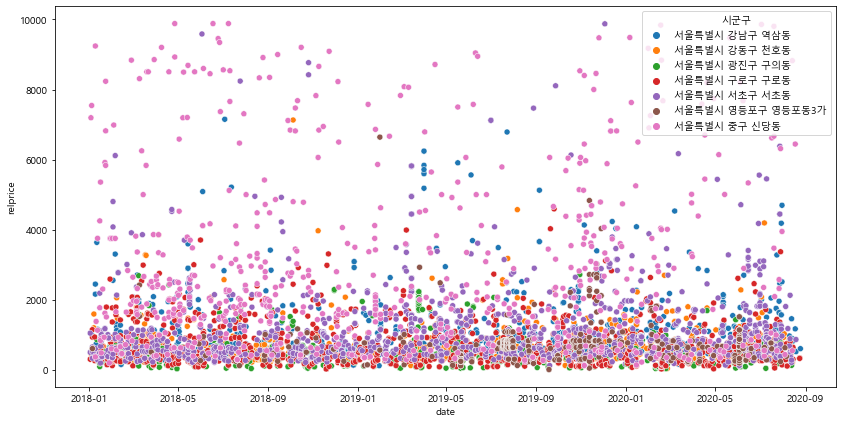

In [35]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=est_df_02, x='date', y='relprice', hue='시군구')

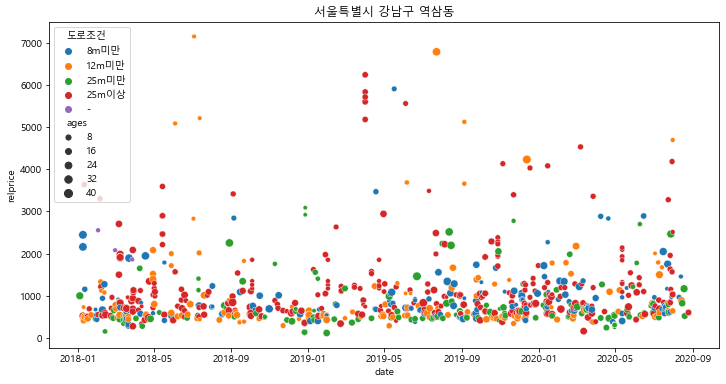

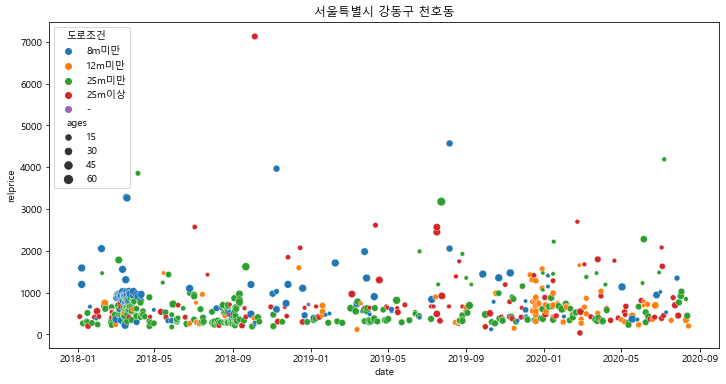

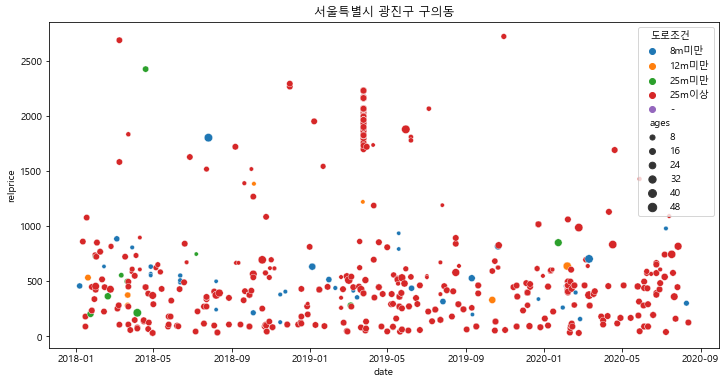

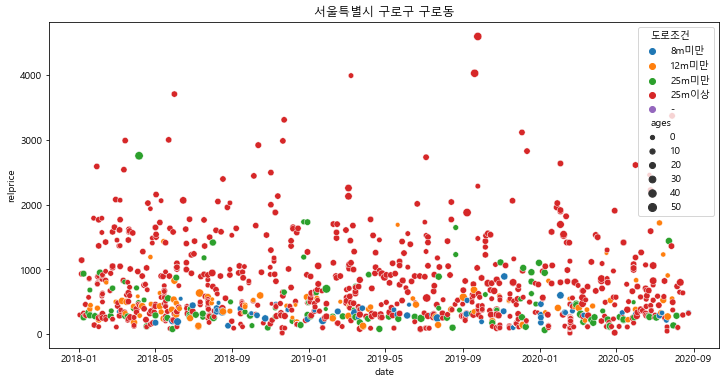

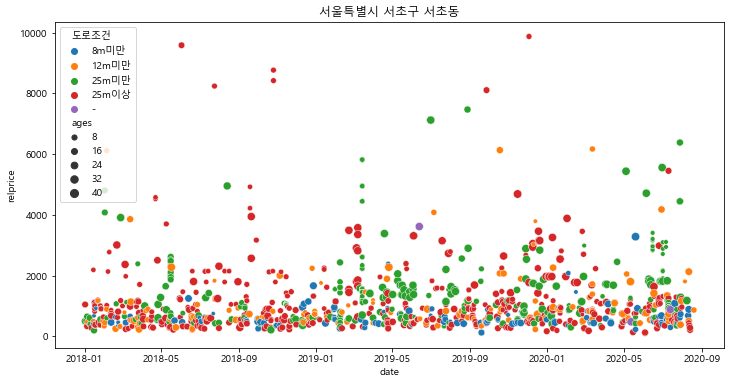

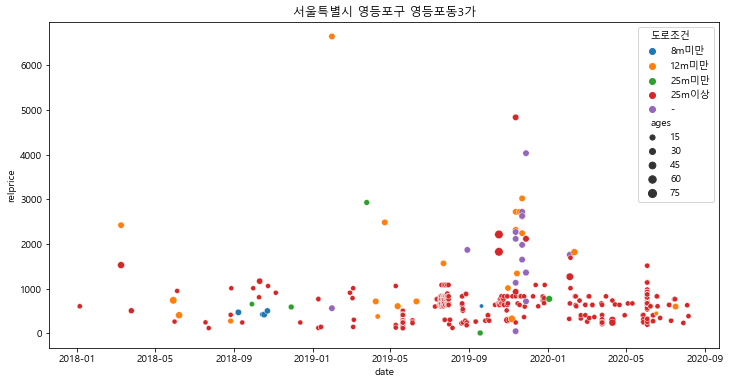

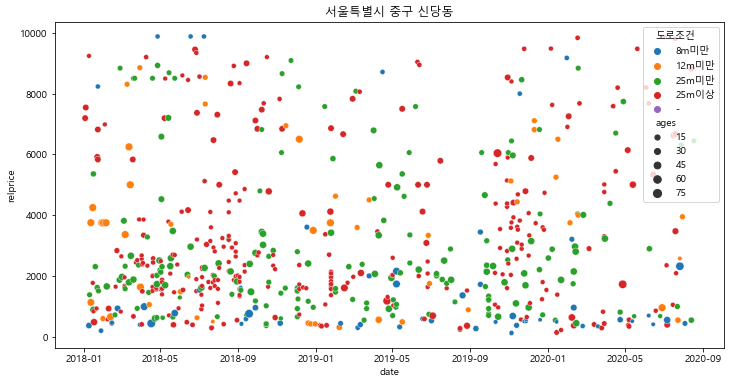

In [38]:
road_cond = ['8m미만', '12m미만', '25m미만', '25m이상', '-']

for prov_i in est_df_02['시군구'].unique():
    plt.figure(figsize=(12, 6))
    ipt_df = est_df_02[est_df_02['시군구'].eq(prov_i)]
    sns.scatterplot(data=ipt_df, x='date', y='relprice', hue='도로조건', size='ages',
                   hue_order=road_cond)
    plt.title(prov_i)
    plt.show()



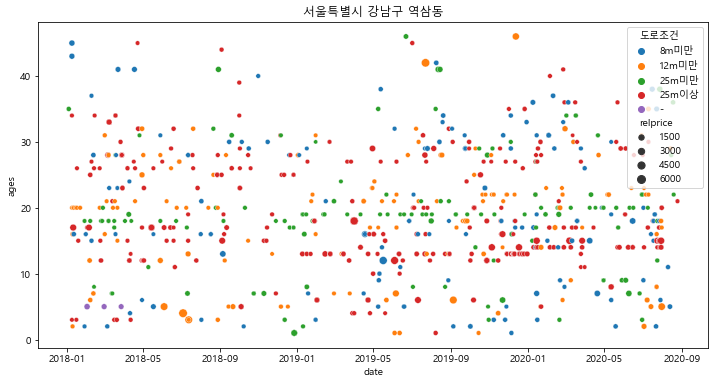

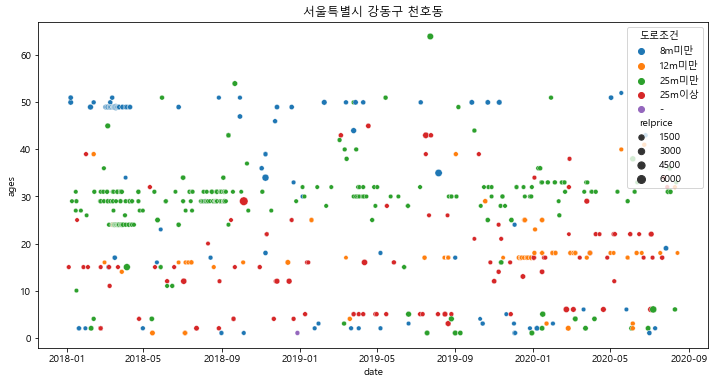

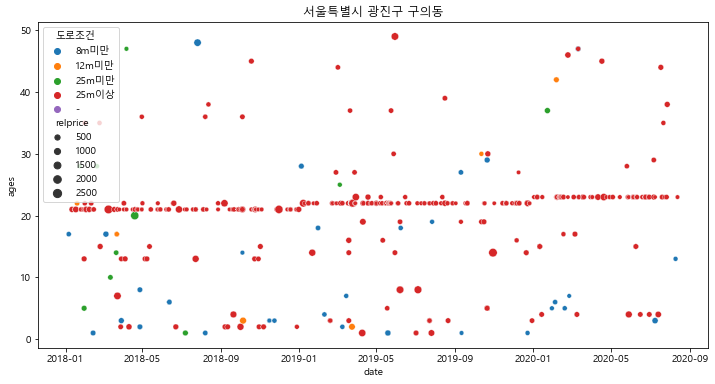

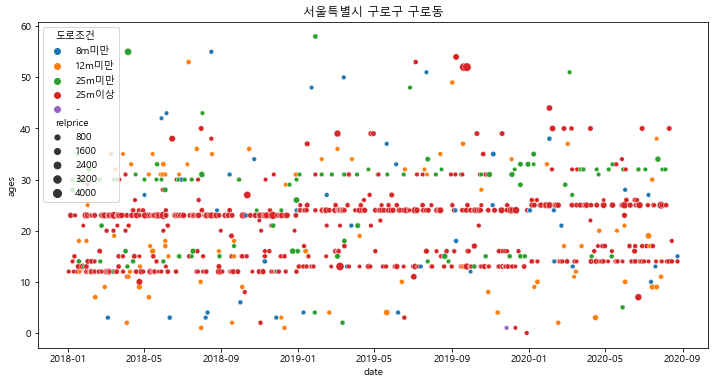

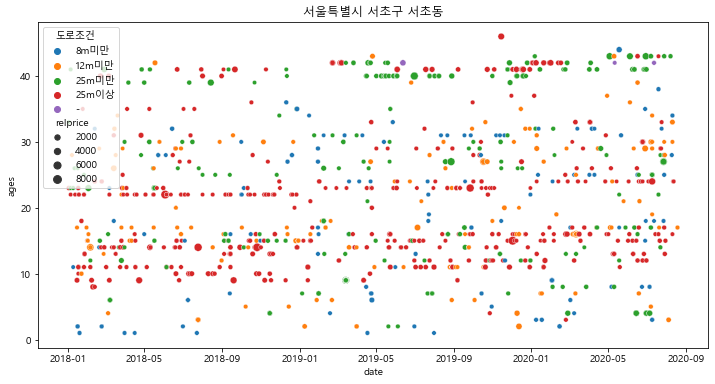

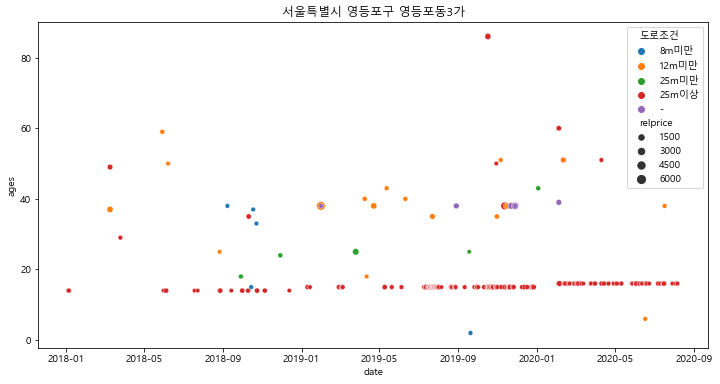

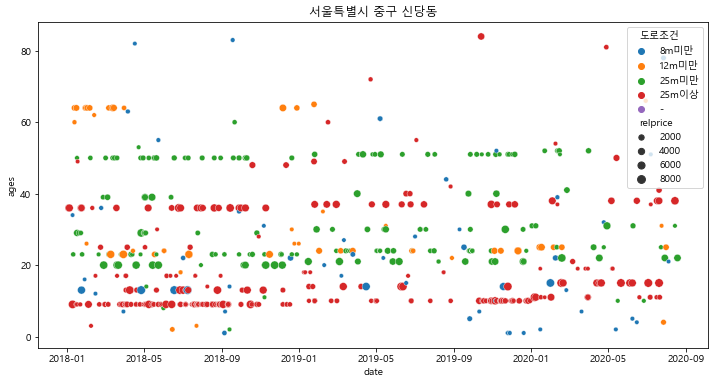

In [39]:
road_cond = ['8m미만', '12m미만', '25m미만', '25m이상', '-']

for prov_i in est_df_02['시군구'].unique():
    plt.figure(figsize=(12, 6))
    ipt_df = est_df_02[est_df_02['시군구'].eq(prov_i)]
    sns.scatterplot(data=ipt_df, x='date', y='ages', hue='도로조건', size='relprice',
                   hue_order=road_cond)
    plt.title(prov_i)
    plt.show()

In [40]:
est_df_02.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),...,cont_yyyy,cont_mm,cont_dd,ages,city,prvn,dstc,price,date,relprice
699,서울특별시 강남구 역삼동,일반,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,1050.72,449.3,"1,050,000",...,2018,01,4,35.0,서울특별시,강남구,역삼동,1050000,2018-01-04,999.314756
700,서울특별시 강남구 역삼동,집합,7**,언주로,제3종일반주거,제1종근린생활,25m이상,41.40,,"17,238",...,2018,01,9,3.0,서울특별시,강남구,역삼동,17238,2018-01-09,416.376812
701,서울특별시 강남구 역삼동,일반,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,236.24,136.7,"510,000",...,2018,01,9,43.0,서울특별시,강남구,역삼동,510000,2018-01-09,2158.821537
702,서울특별시 강남구 역삼동,집합,8**,강남대로,일반상업,업무,25m이상,156.11,,"81,500",...,2018,01,9,34.0,서울특별시,강남구,역삼동,81500,2018-01-09,522.067773
703,서울특별시 강남구 역삼동,집합,8**,도곡로3길,일반상업,업무,12m미만,38.80,,"16,800",...,2018,01,9,20.0,서울특별시,강남구,역삼동,16800,2018-01-09,432.989691


In [135]:
# 고유 건물 혹은 지번에 대한 PK 생성

# est_df_02.iloc[:,:7].columns
# >>> Index(['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건'], dtype='object')

# PK 생성
est_df_02['blck_nm'] = est_df_02.iloc[:,:7].astype(str).apply(lambda row : '_'.join(row.values), axis=1)

print(' The Number of Distinguishable bldg. blocks : ',  est_df_02['blck_nm'].nunique())



 The Number of Distinguishable bldg. blocks :  1171


In [136]:
block_id_master = pd.Series(est_df_02['blck_nm'].unique()).sort_values().reset_index(drop=True).reset_index()
print(' The Number of Distinguishable bldg. blocks : ', len(block_id_master))
block_id_master[:4]

 The Number of Distinguishable bldg. blocks :  1171


,index,0
0,0,서울특별시 강남구 역삼동_일반_6**_강남대로100길_제1종전용주거_제1종근린생활_...
1,1,서울특별시 강남구 역삼동_일반_6**_강남대로100길_제2종일반주거_제2종근린생활_...
2,2,서울특별시 강남구 역삼동_일반_6**_강남대로102길_제1종전용주거_제1종근린생활_...
3,3,서울특별시 강남구 역삼동_일반_6**_강남대로110길_제1종전용주거_제1종근린생활_...


In [137]:
# master 테이블 컬럼명 지정, 블록 ID 코드화 
block_id_master.columns = ['blck_id', 'blck_nm']

block_id_master['blck_id'] = block_id_master['blck_id'].astype(str).str.rjust(width=3, fillchar='0')

block_id_master

,blck_id,blck_nm
0,000,서울특별시 강남구 역삼동_일반_6**_강남대로100길_제1종전용주거_제1종근린생활_...
1,001,서울특별시 강남구 역삼동_일반_6**_강남대로100길_제2종일반주거_제2종근린생활_...
2,002,서울특별시 강남구 역삼동_일반_6**_강남대로102길_제1종전용주거_제1종근린생활_...
3,003,서울특별시 강남구 역삼동_일반_6**_강남대로110길_제1종전용주거_제1종근린생활_...
4,004,서울특별시 강남구 역삼동_일반_6**_강남대로110길_제3종일반주거_제2종근린생활_...
...,...,...
1166,1166,서울특별시 중구 신당동_집합_8**_다산로36길_제3종일반주거_기타_12m미만
1167,1167,서울특별시 중구 신당동_집합_8**_다산로_제3종일반주거_교육연구_25m이상
1168,1168,서울특별시 중구 신당동_집합_8**_다산로_제3종일반주거_제1종근린생활_25m이상
1169,1169,서울특별시 중구 신당동_집합_8**_다산로_제3종일반주거_제2종근린생활_25m이상


In [138]:
# 건물 고유 블록단위 ID로 변환 
est_df_03 = est_df_02.merge(block_id_master, on='blck_nm', how='left')
est_df_03.head()

# est_df_03.columns
# ['시군구', '유형', '지번', '도로명', '용도지역', '건축물주용도', '도로조건', '전용/연면적(㎡)',
#        '대지면적(㎡)', '거래금액(만원)', '층', '계약년월', '계약일', '지분구분', '건축년도', 'cont_yyyy',
#        'cont_mm', 'cont_dd', 'ages', 'city', 'prvn', 'dstc', 'price', 'date',
#        'relprice', 'blck_id']

# Dataset
col_ = ['blck_id', '시군구', 'prvn', 'dstc','지번', '도로명', '용도지역', '건축물주용도', '도로조건', '유형',
'전용/연면적(㎡)', 'ages', '층', 'date', 'price', 'relprice']

est_df_03 = est_df_03[col_]
est_df_03.head()


,blck_id,시군구,prvn,dstc,지번,도로명,용도지역,건축물주용도,도로조건,유형,전용/연면적(㎡),ages,층,date,price,relprice
0,012,서울특별시 강남구 역삼동,강남구,역삼동,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,일반,1050.72,35.0,NaN,2018-01-04,1050000,999.314756
1,233,서울특별시 강남구 역삼동,강남구,역삼동,7**,언주로,제3종일반주거,제1종근린생활,25m이상,집합,41.40,3.0,NaN,2018-01-09,17238,416.376812
2,162,서울특별시 강남구 역삼동,강남구,역삼동,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,일반,236.24,43.0,NaN,2018-01-09,510000,2158.821537
3,261,서울특별시 강남구 역삼동,강남구,역삼동,8**,강남대로,일반상업,업무,25m이상,집합,156.11,34.0,NaN,2018-01-09,81500,522.067773
4,269,서울특별시 강남구 역삼동,강남구,역삼동,8**,도곡로3길,일반상업,업무,12m미만,집합,38.80,20.0,6.0,2018-01-09,16800,432.989691


<AxesSubplot:>

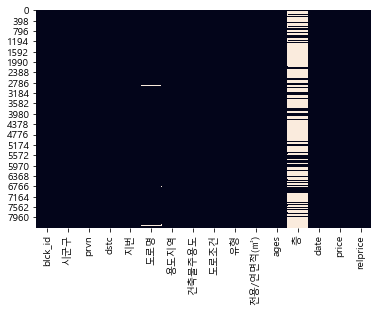

In [140]:
sns.heatmap(est_df_03.isnull(), cbar=False)

In [141]:
vals_ = {'도로명': "----", }
est_df_03.fillna(value=vals_, inplace=True)

<AxesSubplot:>

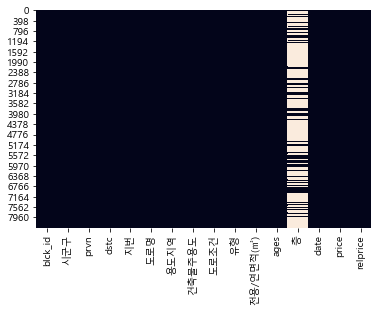

In [142]:
sns.heatmap(est_df_03.isnull(), cbar=False)

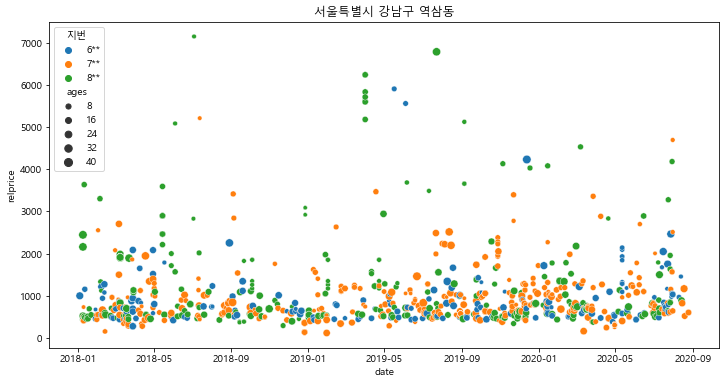

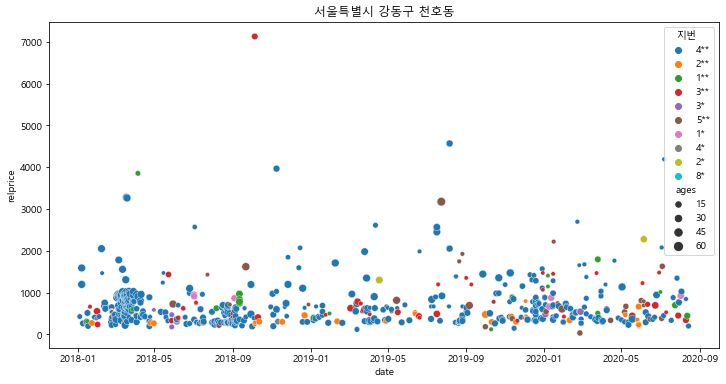

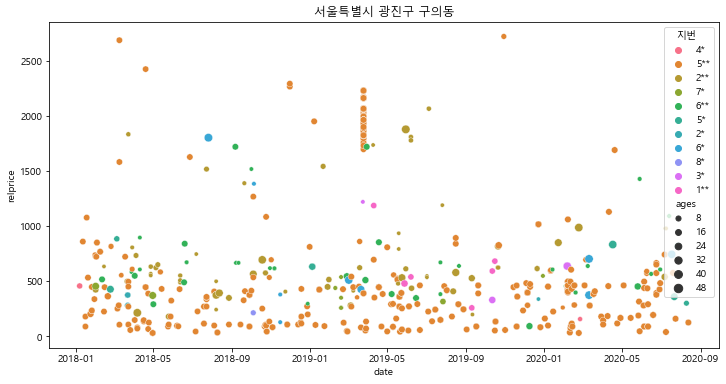

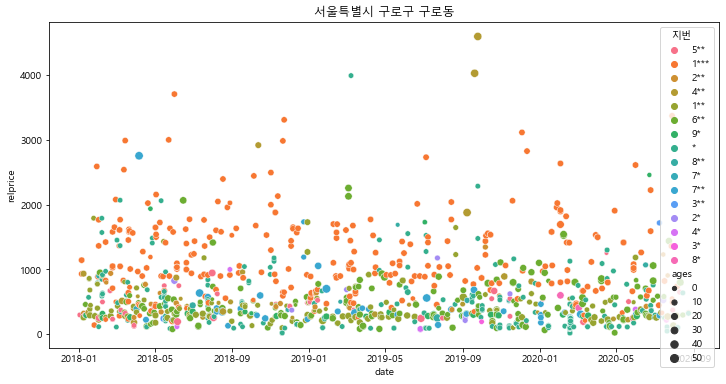

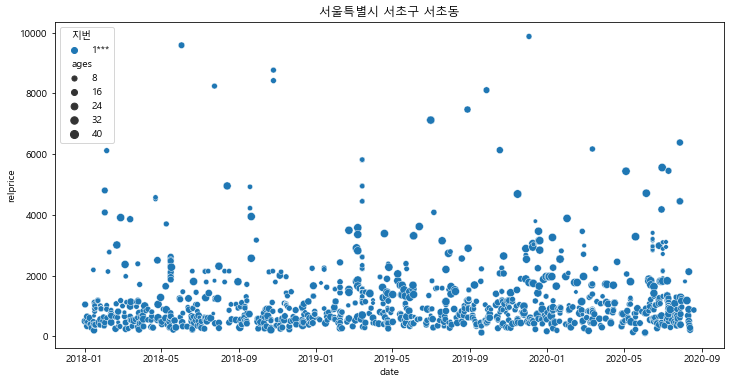

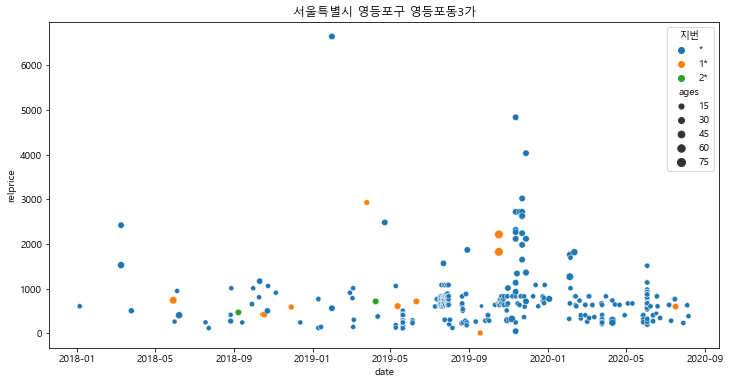

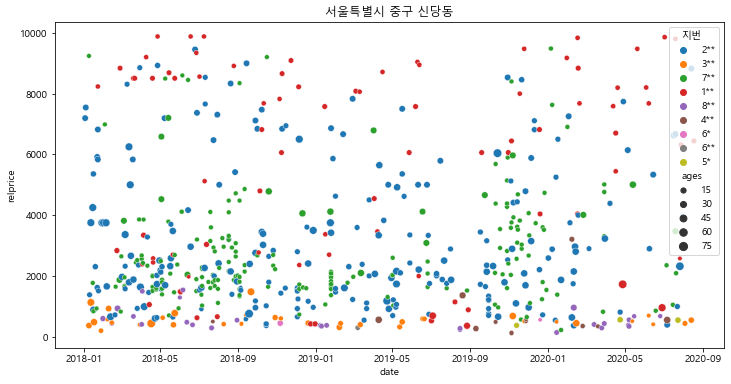

In [147]:
# road_cond = ['8m미만', '12m미만', '25m미만', '25m이상', '-']

for prov_i in est_df_03['시군구'].unique():
    plt.figure(figsize=(12, 6))
    ipt_df = est_df_03[est_df_03['시군구'].eq(prov_i)]
    sns.scatterplot(data=ipt_df, x='date', y='relprice', hue='지번', size='ages')
    plt.title(prov_i)
    plt.show()

# ==========================
# est_df_03['시군구'].eq()

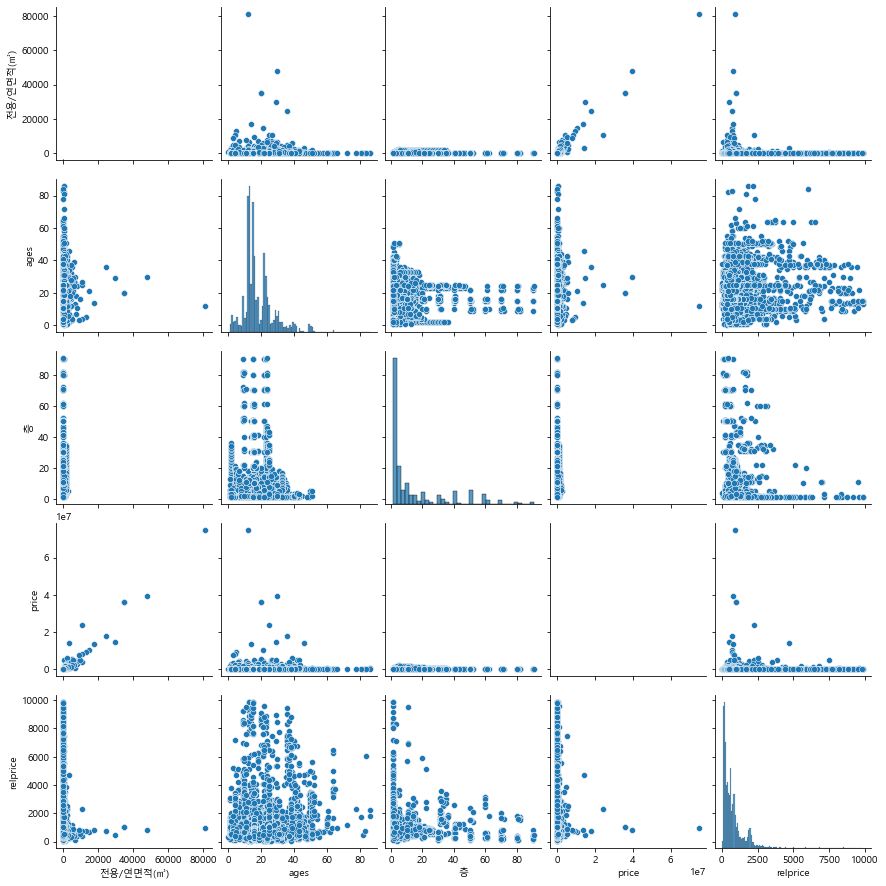

In [148]:
# est_df_03
sns.pairplot(est_df_03)

In [158]:
# est_df_03.head()

test_id = est_df_03['blck_id'].unique()[0]

# est_df_03.loc[est_df_03['blck_id'].eq(test_id),]

blck_freq = est_df_03['blck_id'].value_counts()[:20]

print('분석 대상 block :')
print(blck_freq[blck_freq.gt(120)])

target_blck = blck_freq[blck_freq.gt(120)].index




분석 대상 block :
590     1034
1057    1017
586      758
500      501
595      243
405      188
1164     180
402      164
Name: blck_id, dtype: int64


In [165]:
target_blck
est_df_03.head()

,blck_id,시군구,prvn,dstc,지번,도로명,용도지역,건축물주용도,도로조건,유형,전용/연면적(㎡),ages,층,date,price,relprice
0,012,서울특별시 강남구 역삼동,강남구,역삼동,6**,논현로93길,제3종일반주거,제2종근린생활,25m미만,일반,1050.72,35.0,NaN,2018-01-04,1050000,999.314756
1,233,서울특별시 강남구 역삼동,강남구,역삼동,7**,언주로,제3종일반주거,제1종근린생활,25m이상,집합,41.40,3.0,NaN,2018-01-09,17238,416.376812
2,162,서울특별시 강남구 역삼동,강남구,역삼동,8**,테헤란로1길,제2종일반주거,제2종근린생활,8m미만,일반,236.24,43.0,NaN,2018-01-09,510000,2158.821537
3,261,서울특별시 강남구 역삼동,강남구,역삼동,8**,강남대로,일반상업,업무,25m이상,집합,156.11,34.0,NaN,2018-01-09,81500,522.067773
4,269,서울특별시 강남구 역삼동,강남구,역삼동,8**,도곡로3길,일반상업,업무,12m미만,집합,38.80,20.0,6.0,2018-01-09,16800,432.989691


<Figure size 432x864 with 0 Axes>

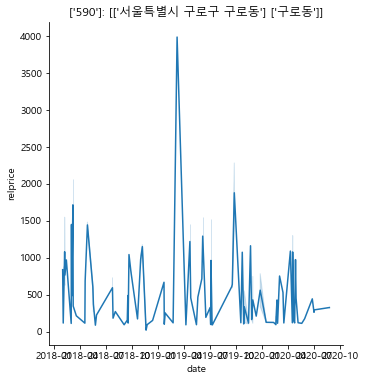

<Figure size 432x864 with 0 Axes>

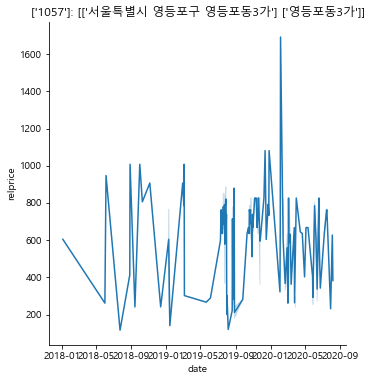

<Figure size 432x864 with 0 Axes>

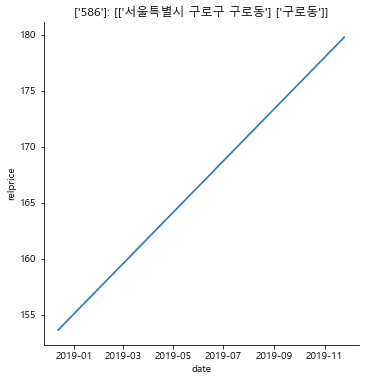

<Figure size 432x864 with 0 Axes>

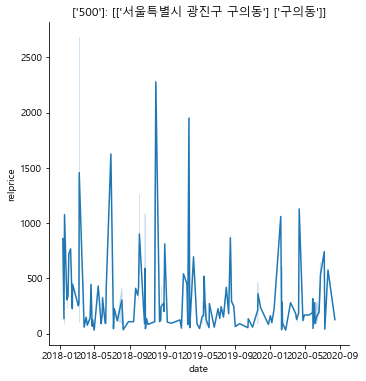

<Figure size 432x864 with 0 Axes>

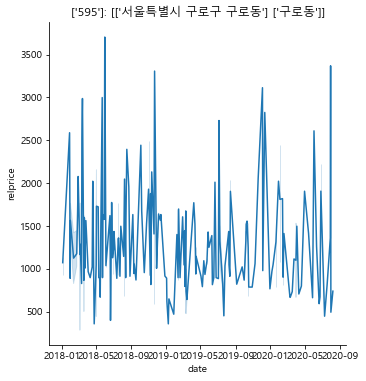

<Figure size 432x864 with 0 Axes>

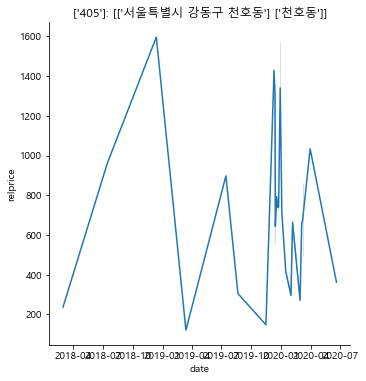

<Figure size 432x864 with 0 Axes>

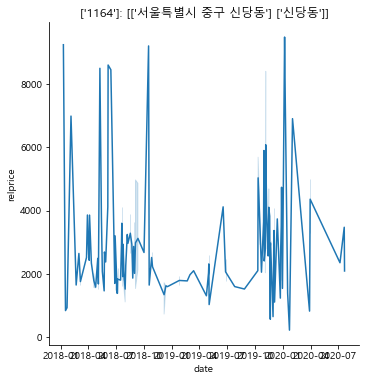

<Figure size 432x864 with 0 Axes>

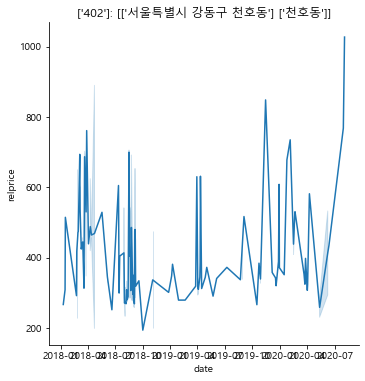

In [168]:
test_id = target_blck[0]

for block_i in target_blck:
    plt.figure(figsize=(6, 12))
    i_df = est_df_03.loc[est_df_03['blck_id'].eq(block_i),]
    sns.relplot(data=i_df, x='date', y='relprice', kind='line')
    plt.title("{0}: [{1} {2}]".format(i_df['blck_id'].unique(), i_df['시군구'].unique(), i_df['dstc'].unique()))
    plt.show() 

In [173]:
guro_tmp = est_df_03.loc[est_df_03['blck_id'].eq('586')]
guro_tmp

,blck_id,시군구,prvn,dstc,지번,도로명,용도지역,건축물주용도,도로조건,유형,전용/연면적(㎡),ages,층,date,price,relprice
1324,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,10.15,12.0,NaN,2018-12-12,1560,153.694581
1325,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,10.12,12.0,NaN,2018-12-12,1555,153.656126
1326,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,10.15,12.0,NaN,2018-12-12,1560,153.694581
1327,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.44,12.0,NaN,2018-12-12,1451,153.707627
1328,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.64,12.0,NaN,2018-12-12,1481,153.630705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.76,13.0,NaN,2019-11-25,1755,179.815574
4985,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.57,13.0,NaN,2019-11-25,1720,179.728318
4986,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.26,13.0,NaN,2019-11-25,1665,179.805616
4987,586,서울특별시 구로구 구로동,구로구,구로동,*,새말로,일반상업,교육연구,25m이상,집합,9.67,13.0,NaN,2019-11-25,1738,179.731127


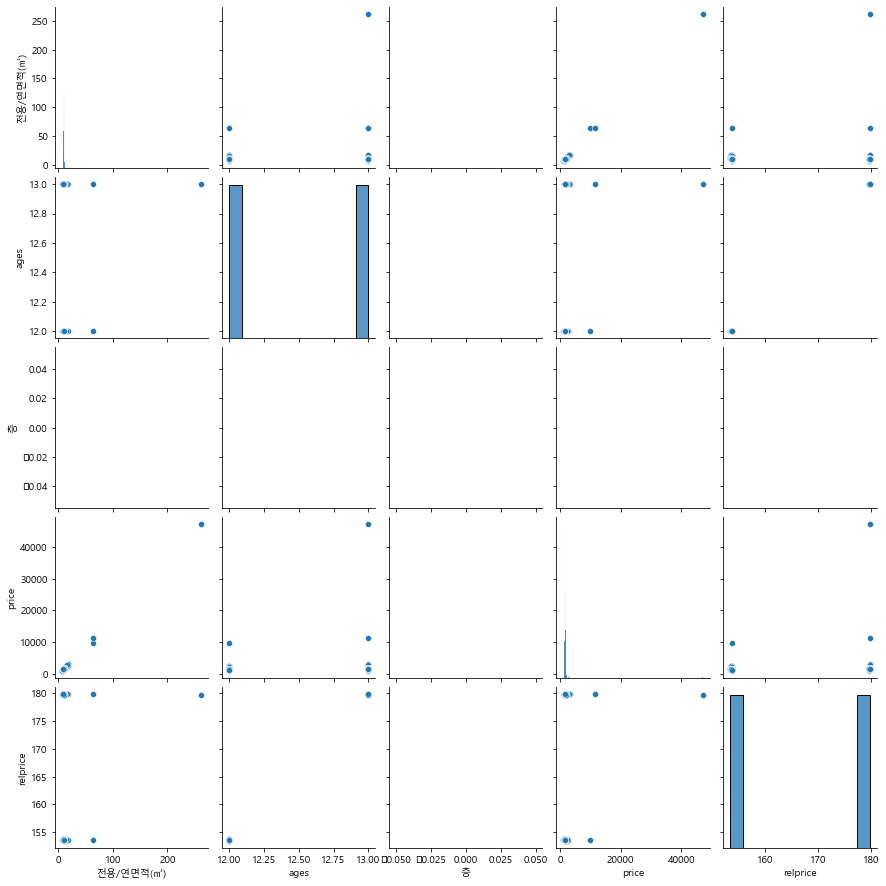

In [174]:
sns.pairplot(guro_tmp)

In [203]:
# converting 날짜 변수 > str
est_df_03['year'] = est_df_03['date'].dt.year.astype(str)
est_df_03['month'] = est_df_03['date'].dt.month.astype(str)
est_df_03['day'] = est_df_03['date'].dt.day.astype(str)

In [204]:
est_df_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8355 entries, 0 to 8354
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   blck_id    8355 non-null   object        
 1   시군구        8355 non-null   object        
 2   prvn       8355 non-null   object        
 3   dstc       8355 non-null   object        
 4   지번         8355 non-null   object        
 5   도로명        8355 non-null   object        
 6   용도지역       8355 non-null   object        
 7   건축물주용도     8355 non-null   object        
 8   도로조건       8355 non-null   object        
 9   유형         8355 non-null   object        
 10  전용/연면적(㎡)  8355 non-null   float64       
 11  ages       8355 non-null   float64       
 12  층          2635 non-null   float64       
 13  date       8355 non-null   datetime64[ns]
 14  price      8355 non-null   int32         
 15  relprice   8355 non-null   float64       
 16  year       8355 non-null   object        


In [227]:
# est_df_03.columns

cols_x = ['blck_id', 'prvn', 'dstc', '용도지역', '건축물주용도', '도로조건',
       '유형', '전용/연면적(㎡)', 'ages', '층', 'year', 'month', 'day','price']
cols_y = ['relprice']

df_x_011 = est_df_03[cols_x]
df_y_011 = est_df_03[cols_y]

In [228]:
# get_dummies 적용하는데 구분할 필요없었음. 
df_x_012 = pd.get_dummies(df_x_011)
df_x_012.shape

(8355, 1256)

,전용/연면적(㎡),ages,층,price,blck_id_000,blck_id_001,blck_id_002,blck_id_003,blck_id_004,blck_id_005,...,day_29,day_3,day_30,day_31,day_4,day_5,day_6,day_7,day_8,day_9
0,1050.72,35.0,NaN,1050000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,41.40,3.0,NaN,17238,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,236.24,43.0,NaN,510000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,156.11,34.0,NaN,81500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,38.80,20.0,6.0,16800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


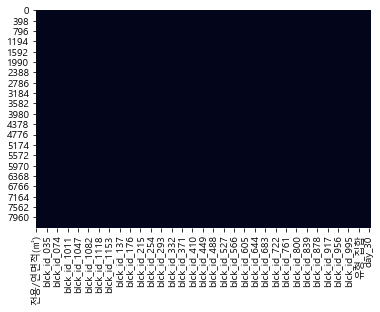

In [229]:
sns.heatmap(df_x_012.isnull(), cbar=False)

df_x_012.head()


In [230]:
df_x_012.loc[df_x_012['층'].isnull(), '층'] = df_x_012['층'].mean()
print(df_x_012['층'].isnull().sum())

0


In [231]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

### fit in 

In [232]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [233]:

X_train, X_test, y_train, y_test = train_test_split(df_x_012, df_y_011, test_size=0.2, random_state=100)

In [234]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 3662 to 5640
Columns: 1256 entries, 전용/연면적(㎡) to day_9
dtypes: float64(3), int32(1), uint8(1252)
memory usage: 8.2 MB


In [253]:
# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 30140472.205
Ridge 로그 변환된 RMSE: 652.044
Lasso 로그 변환된 RMSE: 673.57


[30140472.205091517, 652.0440577283092, 673.5702165560634]

In [269]:
# lr_reg.coef_.shape

# X_features = df_x_012

np.array([X_features.columns]).shape



(1, 1256)

In [276]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

ValueError: Length of passed values is 1, index implies 1256.

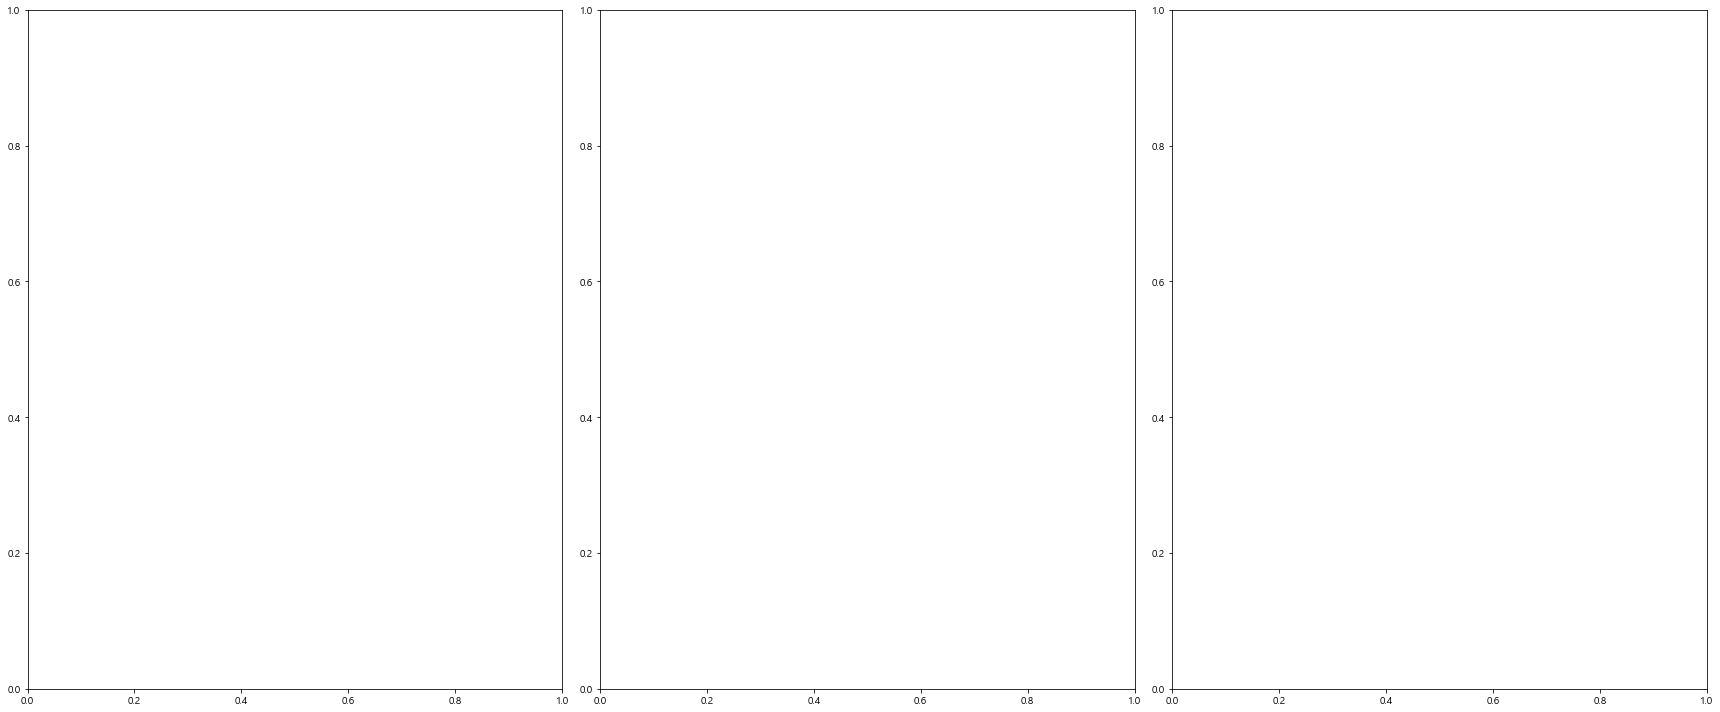

In [277]:
def visualize_coefficient(models):
# 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [278]:

from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


NameError: name 'y_target' is not defined

In [ ]:

from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)
